In [1]:
# libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from dm_tools import data_prep
from sklearn.preprocessing import StandardScaler

# set the random seed - consistent
rs = 10

# load the data
df,X,y,X_train, X_test, y_train, y_test = data_prep()

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)

In [2]:
from sklearn.neural_network import MLPClassifier

model_1 = MLPClassifier(random_state=rs)
model_1.fit(X_train, y_train)

print("Train accuracy:", model_1.score(X_train, y_train))
print("Test accuracy:", model_1.score(X_test, y_test))

y_pred = model_1.predict(X_test)
print(classification_report(y_test, y_pred))

print(model_1)

Train accuracy: 0.9966452334358401
Test accuracy: 0.7920469361147328
              precision    recall  f1-score   support

       False       0.83      0.84      0.84       973
        True       0.72      0.71      0.71       561

    accuracy                           0.79      1534
   macro avg       0.78      0.77      0.78      1534
weighted avg       0.79      0.79      0.79      1534

MLPClassifier(random_state=10)


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [3]:
print(X_train.shape)

(3577, 158)


In [4]:
params = {'hidden_layer_sizes': [(x,) for x in range(5, 159, 25)]}

cv_1 = GridSearchCV(param_grid=params, estimator=MLPClassifier(max_iter=500, random_state=rs),return_train_score=True, cv=10, n_jobs=-1)
cv_1.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(max_iter=500, random_state=10),
             n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(5,), (30,), (55,), (80,),
                                                (105,), (130,), (155,)]},
             return_train_score=True)

In [5]:
print("Train accuracy:", cv_1.score(X_train, y_train))
print("Test accuracy:", cv_1.score(X_test, y_test))

y_pred = cv_1.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_1.best_params_)

Train accuracy: 0.9994408722393067
Test accuracy: 0.7698826597131682
              precision    recall  f1-score   support

       False       0.82      0.81      0.82       973
        True       0.68      0.69      0.69       561

    accuracy                           0.77      1534
   macro avg       0.75      0.75      0.75      1534
weighted avg       0.77      0.77      0.77      1534

{'hidden_layer_sizes': (80,)}


In [6]:
# new parameters
params = {'hidden_layer_sizes': [(78,), (80,), (82,), (84,)]}

cv_2 = GridSearchCV(param_grid=params, estimator=MLPClassifier(max_iter=500, random_state=rs), cv=10, n_jobs=-1)
cv_2.fit(X_train, y_train)

print("Train accuracy:", cv_2.score(X_train, y_train))
print("Test accuracy:", cv_2.score(X_test, y_test))

y_pred = cv_2.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_2.best_params_)

Train accuracy: 0.9994408722393067
Test accuracy: 0.7698826597131682
              precision    recall  f1-score   support

       False       0.82      0.81      0.82       973
        True       0.68      0.69      0.69       561

    accuracy                           0.77      1534
   macro avg       0.75      0.75      0.75      1534
weighted avg       0.77      0.77      0.77      1534

{'hidden_layer_sizes': (80,)}


In [7]:
params = {'hidden_layer_sizes': [(78,), (80,), (82,), (84,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv_3 = GridSearchCV(param_grid=params, estimator=MLPClassifier(max_iter=500,random_state=rs), cv=10, n_jobs=-1)
cv_3.fit(X_train, y_train)

print("Train accuracy:", cv_3.score(X_train, y_train))
print("Test accuracy:", cv_3.score(X_test, y_test))

y_pred = cv_3.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_3.best_params_)

Train accuracy: 1.0
Test accuracy: 0.7796610169491526
              precision    recall  f1-score   support

       False       0.82      0.83      0.83       973
        True       0.70      0.70      0.70       561

    accuracy                           0.78      1534
   macro avg       0.76      0.76      0.76      1534
weighted avg       0.78      0.78      0.78      1534

{'alpha': 0.01, 'hidden_layer_sizes': (84,)}


In [8]:
import pickle
with open('DT.pickle', 'rb') as f:
    dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv = pickle.load(f)

print(dt_best.best_params_)

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 200}


In [9]:
from dm_tools import analyse_feature_importance

analyse_feature_importance(dt_best.best_estimator_, X.columns)

covid19_symptoms : 0.5114692111028925
income_high : 0.23490201645435005
worried : 0.1306435684518856
working_travel critical : 0.06999676133951642
working_stopped : 0.024033437333870977
house_count : 0.013625616577004623
weight : 0.0060598971651324
country_US : 0.005114601163527021
risk_mortality : 0.0035230137449006093
contacts_count : 0.0006318766669198722
country_GB : 0.0
country_GE : 0.0
country_HK : 0.0
country_GR : 0.0
country_GT : 0.0
country_FI : 0.0
country_FR : 0.0
working_travel non critical : 0.0
country_ET : 0.0
country_ES : 0.0


In [10]:
from sklearn.feature_selection import SelectFromModel
selectmodel = SelectFromModel(dt_best.best_estimator_, prefit=True)
X_train_sel_model = selectmodel.transform(X_train)
X_test_sel_model = selectmodel.transform(X_test)
print(X_train_sel_model.shape)

(3577, 6)


In [11]:
params = {'hidden_layer_sizes': [(78,), (80,), (82,), (84,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv_sel_model = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv_sel_model.fit(X_train_sel_model, y_train)

print("Train accuracy:", cv_sel_model.score(X_train_sel_model, y_train))
print("Test accuracy:", cv_sel_model.score(X_test_sel_model, y_test))

y_pred = cv_sel_model.predict(X_test_sel_model)
print(classification_report(y_test, y_pred))

print(cv_sel_model.best_params_)

Train accuracy: 0.8029074643556052
Test accuracy: 0.7835723598435462
              precision    recall  f1-score   support

       False       0.81      0.86      0.83       973
        True       0.73      0.65      0.69       561

    accuracy                           0.78      1534
   macro avg       0.77      0.75      0.76      1534
weighted avg       0.78      0.78      0.78      1534

{'alpha': 0.01, 'hidden_layer_sizes': (78,)}


In [12]:
from sklearn.metrics import roc_auc_score

y_pred_proba_nn_1 = model_1.predict_proba(X_test)
y_pred_proba_cv_1 = cv_1.predict_proba(X_test)
y_pred_proba_cv_2 = cv_2.predict_proba(X_test)
y_pred_proba_cv_3 = cv_3.predict_proba(X_test)
y_pred_proba_cv_sel_model = cv_sel_model.predict_proba(X_test_sel_model)


roc_index_nn_1 = roc_auc_score(y_test, y_pred_proba_nn_1[:, 1])
roc_index_cv_1 = roc_auc_score(y_test, y_pred_proba_cv_1[:, 1])
roc_index_cv_2 = roc_auc_score(y_test, y_pred_proba_cv_2[:, 1])
roc_index_cv_3 = roc_auc_score(y_test, y_pred_proba_cv_3[:, 1])
roc_index_cv_sel_model = roc_auc_score(y_test, y_pred_proba_cv_sel_model[:, 1])


print("ROC index on test for NN_default:", roc_index_nn_1)
print("ROC index on test for NN with gridsearch 1:", roc_index_cv_1)
print("ROC index on test for NN with gridsearch 2:", roc_index_cv_2)
print("ROC index on test for NN with gridsearch 3:", roc_index_cv_3)
print("ROC index on test for NN with feature selection (model selection) and gridsearch:", roc_index_cv_sel_model)

from sklearn.metrics import roc_curve

fpr_nn_1, tpr_nn_1, thresholds_nn_1 = roc_curve(y_test, y_pred_proba_nn_1[:,1])
#fpr_nn_2, tpr_nn_2, thresholds_nn_2 = roc_curve(y_test, y_pred_proba_nn_2[:,1])
fpr_cv_1, tpr_cv_1, thresholds_cv_1 = roc_curve(y_test, y_pred_proba_cv_1[:,1])
fpr_cv_2, tpr_cv_2, thresholds_cv_2 = roc_curve(y_test, y_pred_proba_cv_2[:,1])
fpr_cv_3, tpr_cv_3, thresholds_cv_3 = roc_curve(y_test, y_pred_proba_cv_3[:,1])
fpr_cv_sel_model, tpr_cv_sel_model, thresholds_cv_sel_model = roc_curve(y_test, y_pred_proba_cv_sel_model[:,1])

ROC index on test for NN_default: 0.8563459392913477
ROC index on test for NN with gridsearch 1: 0.8392076254962417
ROC index on test for NN with gridsearch 2: 0.8392076254962417
ROC index on test for NN with gridsearch 3: 0.8473270276063336
ROC index on test for NN with feature selection (model selection) and gridsearch: 0.8573095686934028


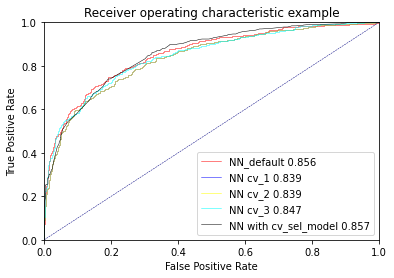

In [13]:
import matplotlib.pyplot as plt

plt.plot(fpr_nn_1, tpr_nn_1, label='NN_default {:.3f}'.format(roc_index_nn_1), color='red', lw=0.5)
plt.plot(fpr_cv_1, tpr_cv_1, label='NN cv_1 {:.3f}'.format(roc_index_cv_1), color='blue', lw=0.5)
plt.plot(fpr_cv_2, tpr_cv_2, label='NN cv_2 {:.3f}'.format(roc_index_cv_2), color='yellow', lw=0.5)
plt.plot(fpr_cv_3, tpr_cv_3, label='NN cv_3 {:.3f}'.format(roc_index_cv_3), color='cyan', lw=0.5)
plt.plot(fpr_cv_sel_model, tpr_cv_sel_model, label='NN with cv_sel_model {:.3f}'.format(roc_index_cv_sel_model), color='black', lw=0.5)


plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [14]:
model_1.get_params(deep=True)

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 10,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [34]:
cv_3.best_estimator_.get_params(deep=True)

{'activation': 'relu',
 'alpha': 0.01,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (84,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 500,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 10,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [35]:
cv_sel_model.best_estimator_.get_params(deep=True)

{'activation': 'relu',
 'alpha': 0.01,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (78,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 10,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [15]:
print("DEFAULT MODEL NETWORK ARCHITECTURE")
print("number of layers = " + str(model_1.n_layers_))
print("number of nodes in input layer = " + str(model_1.n_features_in_))
print("number of nodes in output layer = " + str(model_1.n_outputs_))
print("number of hidden layers = " + str(model_1.n_layers_ - 2))
print("number of neurons in hidden layers = " + 
      str(model_1.get_params(deep=True).get("hidden_layer_sizes")))

DEFAULT MODEL NETWORK ARCHITECTURE
number of layers = 3
number of nodes in input layer = 158
number of nodes in output layer = 1
number of hidden layers = 1
number of neurons in hidden layers = (100,)


In [16]:
print("GRID SEARCH CV NETWORK ARCHITECTURE")
print("number of layers = " + str(cv_3.best_estimator_.n_layers_))
print("number of nodes in input layer = " + str(cv_3.best_estimator_.n_features_in_))
print("number of nodes in output layer = " + str(cv_3.best_estimator_.n_outputs_))
print("number of hidden layers = " + str(cv_3.best_estimator_.n_layers_ - 2))
print("number of neurons in hidden layers = " + 
      str(cv_3.best_estimator_.get_params(deep=True).get("hidden_layer_sizes")))

GRID SEARCH CV NETWORK ARCHITECTURE
number of layers = 3
number of nodes in input layer = 158
number of nodes in output layer = 1
number of hidden layers = 1
number of neurons in hidden layers = (84,)


In [17]:
print("DT SELECTION MODEL CV NETWORK ARCHITECTURE")
print("number of layers = " + str(cv_sel_model.best_estimator_.n_layers_))
print("number of nodes in input layer = " + str(cv_sel_model.best_estimator_.n_features_in_))
print("number of nodes in output layer = " + str(cv_sel_model.best_estimator_.n_outputs_))
print("number of hidden layers = " + str(cv_sel_model.best_estimator_.n_layers_ - 2))
print("number of neurons in hidden layers = " + 
      str(cv_sel_model.best_estimator_.get_params(deep=True).get("hidden_layer_sizes")))

DT SELECTION MODEL CV NETWORK ARCHITECTURE
number of layers = 3
number of nodes in input layer = 6
number of nodes in output layer = 1
number of hidden layers = 1
number of neurons in hidden layers = (78,)


In [19]:
model_1.n_iter_

200

In [36]:
cv_3.best_estimator_.n_iter_

447

In [20]:
cv_sel_model.best_estimator_.n_iter_

150

In [24]:
#Get the new features after performing feature selection
mask = selectmodel.get_support()
new_features = X.columns[mask]

print(new_features)

Index(['house_count', 'worried', 'covid19_symptoms', 'income_high',
       'working_stopped', 'working_travel critical'],
      dtype='object')


In [26]:
import pickle
with open('DT.pickle', 'rb') as f:
    dt_best,roc_index_dt, fpr_dt, tpr_dt = pickle.load(f)
with open('LR.pickle', 'rb') as f:
    lr_best,roc_index_lr, fpr_lr, tpr_lr = pickle.load(f)
# select the best performing neural network
nn_best = cv_sel_model

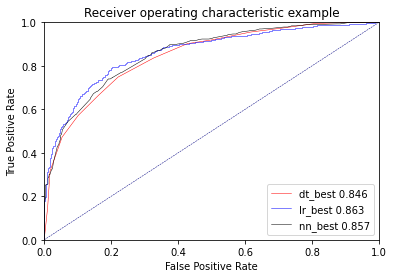

In [27]:
import matplotlib.pyplot as plt

plt.plot(fpr_dt, tpr_dt, label='dt_best {:.3f}'.format(roc_index_dt), color='red', lw=0.5)
plt.plot(fpr_lr, tpr_lr, label='lr_best {:.3f}'.format(roc_index_lr), color='blue', lw=0.5)
plt.plot(fpr_cv_sel_model, tpr_cv_sel_model, label='nn_best {:.3f}'.format(roc_index_cv_sel_model), color='black', lw=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()